# 📌 Install Required Libraries


In [1]:
!pip install imbalanced-learn scikit-learn pandas numpy matplotlib seaborn


# 📊 Load and Explore the Dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59511 entries, 0 to 59510
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    59511 non-null  int64  
 1   V1      59511 non-null  float64
 2   V2      59511 non-null  float64
 3   V3      59511 non-null  float64
 4   V4      59511 non-null  float64
 5   V5      59511 non-null  float64
 6   V6      59511 non-null  float64
 7   V7      59511 non-null  float64
 8   V8      59511 non-null  float64
 9   V9      59511 non-null  float64
 10  V10     59511 non-null  float64
 11  V11     59511 non-null  float64
 12  V12     59511 non-null  float64
 13  V13     59511 non-null  float64
 14  V14     59511 non-null  float64
 15  V15     59511 non-null  float64
 16  V16     59510 non-null  float64
 17  V17     59510 non-null  float64
 18  V18     59510 non-null  float64
 19  V19     59510 non-null  float64
 20  V20     59510 non-null  float64
 21  V21     59510 non-null  float64
 22

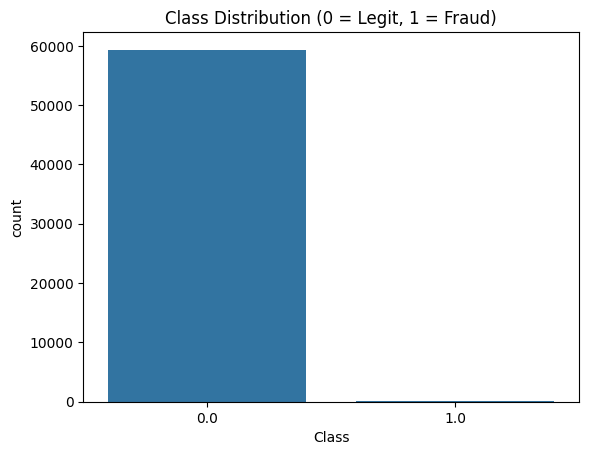

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset (Make sure the file is uploaded in Colab)
df = pd.read_csv("/content/creditcard.csv")

# Display basic info
print(df.info())
print(df.head())

# Check Class Distribution
sns.countplot(x=df['Class'])
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()


# 🔍 Check for Missing Values


In [9]:
print(df.isnull().sum())  # Check for missing values


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# 🧹 Remove Missing Values (If Any)


In [4]:
# Remove rows with NaN values
df = df.dropna()

# Define features & target again
X = df.drop(columns=['Class'])
y = df['Class']


# 🎯 Define Features (X) and Target Variable (y)


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define features & target
X = df.drop(columns=['Class'])
y = df['Class']

# 📏 Scale the "Amount" Feature


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# ✂️ Split Data into Training and Testing Sets


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# ⚖️ Handle Class Imbalance Using SMOTE


In [ ]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Data Preprocessing Done ✅")

# 🤖 Train the Random Forest Model


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = RandomForestClassifier(n_estimators=10, random_state=42)

model.fit(X_train_resampled, y_train_resampled)

print("Model Training Done ✅")


Model Training Done ✅


# 🎯 Make Predictions on Test Data


In [23]:
y_pred = model.predict(X_test)

## 🔹 Feature Importance: Key Factors in Fraud Detection


<ipython-input-18-ee6e0b5d14a4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Blues_r")


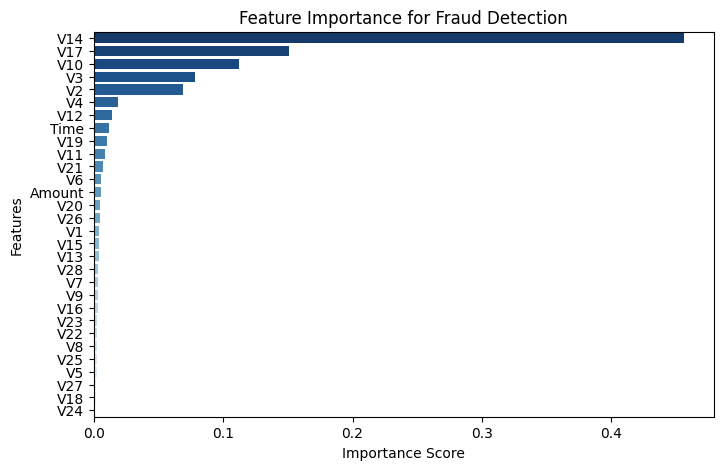

In [18]:
import numpy as np

# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Blues_r")
plt.title("Feature Importance for Fraud Detection")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# 🎨 Confusion Matrix Heatmap


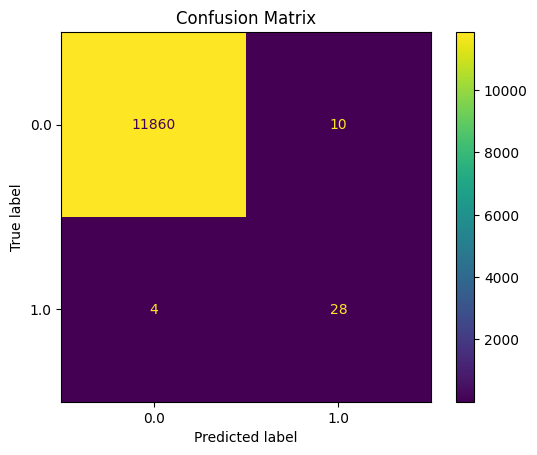

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


# 🎯 Make Predictions on Test Data


In [7]:
# Predictions
y_pred = model.predict(X_test)

Confusion Matrix:
 [[11865     5]
 [    2    30]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11870
         1.0       0.86      0.94      0.90        32

    accuracy                           1.00     11902
   macro avg       0.93      0.97      0.95     11902
weighted avg       1.00      1.00      1.00     11902



# 📊 Model Evaluation Metrics


In [24]:
# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[11860    10]
 [    4    28]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11870
         1.0       0.74      0.88      0.80        32

    accuracy                           1.00     11902
   macro avg       0.87      0.94      0.90     11902
weighted avg       1.00      1.00      1.00     11902



#Metrics More Clearly

In [25]:
import pandas as pd

# Get classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for better readability
report_df = pd.DataFrame(report).transpose()
print(report_df)


              precision    recall  f1-score       support
0.0            0.999663  0.999158  0.999410  11870.000000
1.0            0.736842  0.875000  0.800000     32.000000
accuracy       0.998824  0.998824  0.998824      0.998824
macro avg      0.868252  0.937079  0.899705  11902.000000
weighted avg   0.998956  0.998824  0.998874  11902.000000


# 📈 Precision-Recall Curve for Fraud Detection


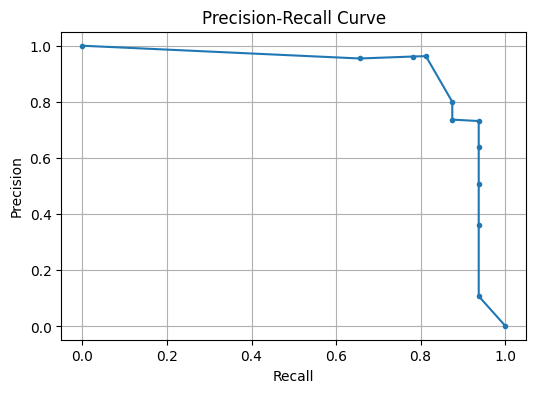

In [19]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


# 🎨 Confusion Matrix Heatmap


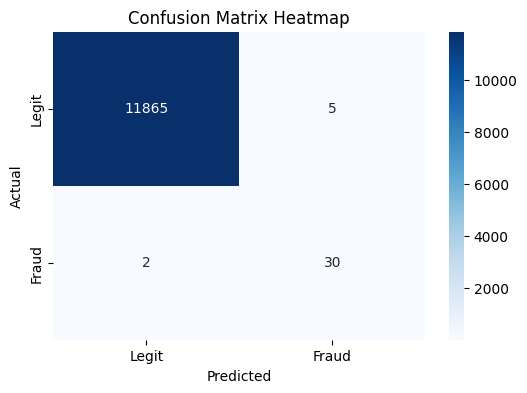

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


# 💾 Save the Trained Model


In [8]:
import pickle

with open("credit_fraud_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model Saved ✅")


Model Saved ✅
